[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/crunchdao/quant-venture-capital-resources/blob/main/quickstarter_random_forest.ipynb)

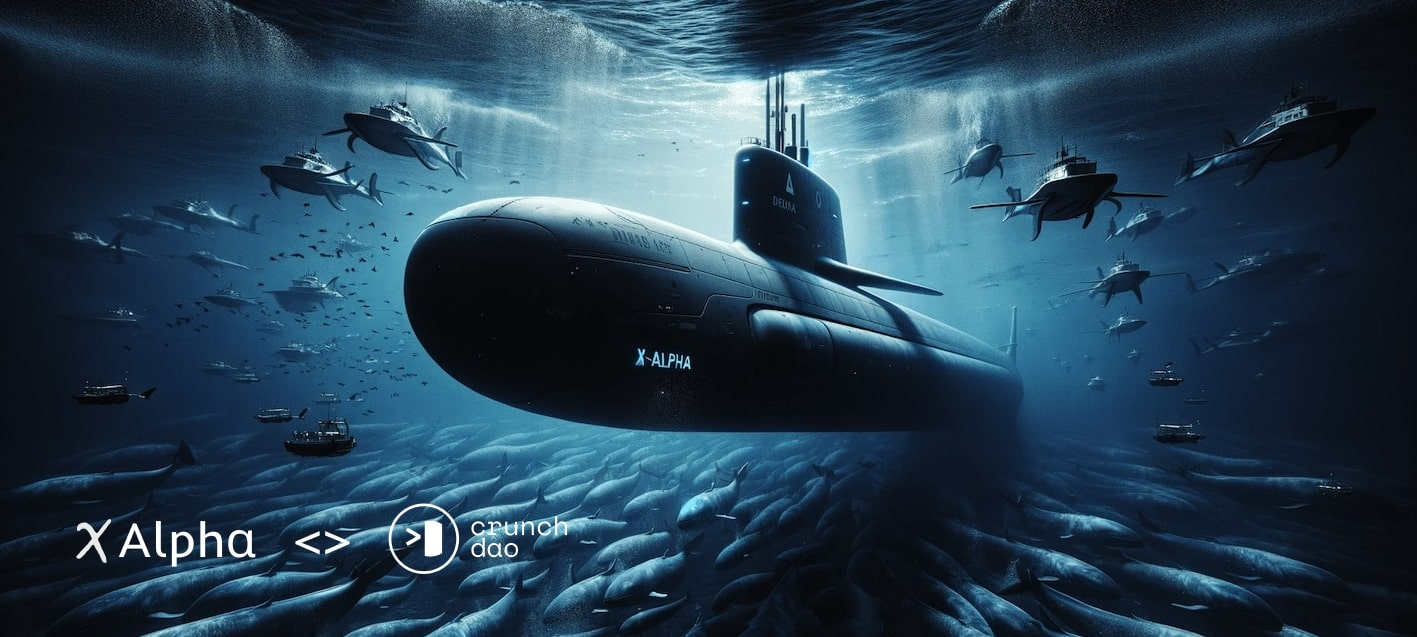

# Set up your crunch workspace

#### STEP 1
Run this cell to install the crunch library in your workspace.
This command will create a crunch-cli folder in your workspace.

In [ ]:
%pip install crunch-cli --upgrade 
!crunch setup venture-capital-portfolio-prediction . --token 42kzWE5Xogd2kLWEexVkjMiG6NrXOkPkB5F0Ob7YoYzD3SfUQb4pqJUXJnVO59RM --force

#### STEP 2
Import the crunch package and instantiate it to be able to access its functionality.

In [25]:
import crunch
crunch = crunch.load_notebook(__name__)

loaded inline runner with module: <module '__main__'>


# X-ALPHA Venture Capital Portfolio Rally

## Submission Phase - 4 Weeks:

- You can submit your solution in the form of either a notebook or a Python script.
- Test your code using the provided test command.
- There is No public leaderboard; [Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is your best friend.


## Data

In [26]:
import pandas as pd
# Getting the data
X_train, y_train, X_test = crunch.load_data()

download data/X_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/X_train.parquet
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/y_train.parquet
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/X_test_reduced.parquet
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/y_test_reduced.parquet
already exists: file length match


In [27]:
display(X_train) # training data = 35 dates

,id,date,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-419354.84375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.11,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,61.0,61.0,0.0,0.00,0.00,0.61,0.86,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [28]:
display(y_train) # training label: target_r3

,id,date,target_r3
0,0,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
...,...,...,...
2662720,5318586,35,0
2662721,5318588,35,0
2662722,5318590,35,0
2662723,5318591,35,0


## Coding Guidelines

Your submission needs to provide at least three components: imports, `train()`, and `infer()`.

1. **Imports:** As with any script, if your solution contains dependencies on external packages, make sure to import them. The system will automatically install your dependencies. Make sure that you are only using packages that are whitelisted [here](https://hub.crunchdao.com/competitions/venture-capital-portfolio-prediction/submit).

2. **`train()`:** In the training phase, users will build the model and train it so that it can perform inferences on the testing data. The model must be saved in the `resources` directory.

3. **`infer()`:** In the inference function, the model trained in the previous step will be loaded and used to perform inferences on a data sample matching the characteristics of the training set.


### Submission Process

1. Ensure that all the code necessary to run your submission is called by either the `train()`, `infer()`, or both functions. The system will parse these functions to execute them in the cloud.

2. Once satisfied with your work, download and submit your notebook (File -> Download -> Download.ipynb).

3. Upload this notebook on [CrunchDAO's Venture Capital Submission page](https://hub.crunchdao.com/competitions/venture-capital-portfolio-prediction/submit).

In [31]:
# Imports
import sklearn
import typing
import joblib

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

def train(X_train: pd.DataFrame, y_train: pd.DataFrame, model_directory_path: str = "resources") -> None:
    """
    Train a Random Forest classifier on the provided data and save it.

    Args:
        X_train: DataFrame with training features.
        y_train: DataFrame with training labels.
        model_directory_path: Path to save the trained model.

    Returns:
        None
    """
    
    # Split the data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Define Random Forest classifier
    model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
    
    # Train the Random Forest model
    model_rf.fit(X_train_split.iloc[:, 2:], y_train_split.iloc[:, 2:])
    
    # Validate the model on the validation set
    val_predictions = model_rf.predict_proba(X_val_split.iloc[:, 2:])
    val_log_loss = log_loss(y_val_split.iloc[:, 2:], val_predictions)
    
    print(f"Validation Log Loss: {val_log_loss}")
    
    # Save the trained model in the specified directory
    model_pathname = Path(model_directory_path) / "model.joblib"
    print(f"Saving model in {model_pathname}")
    joblib.dump(model_rf, model_pathname)


def infer(X_test: pd.DataFrame, model_directory_path: str = "resources") -> pd.DataFrame:
    """
    Use the trained Random Forest model to make predictions on new data.

    Args:
        model_directory_path: Path to the directory containing the trained model.
        X_test: DataFrame with features for inference.

    Returns:
        DataFrame with inferences (date, id, value).
    """
    # Above this threshold, the startup would be classified as 1; below it, it will be classified as 0
    threshold = 0.5
    
    # Load the trained model saved by the train function
    model_rf = joblib.load(Path(model_directory_path) / "model.joblib")

    # Create a DataFrame with date, id, and predicted probabilities
    y_test_predicted = X_test[["date", "id"]].copy()
    y_test_predicted["target_r3"] = model_rf.predict_proba(X_test.iloc[:, 2:])[:, 1]  # Use the probability of the positive class
    
    # Apply threshold for binary predictions
    probs_logitraw = 1 / (1 + np.exp(-y_test_predicted["target_r3"]))
    y_test_predicted["target_r3"] = (probs_logitraw > threshold).astype(int) 

    return y_test_predicted

def temporal_train_test_split(X_train_loc, y_train_loc, test_size=0.2):
    """
    Perform temporal train-test split on the provided data.

    Args:
        X_train_loc: DataFrame with training features.
        y_train_loc: DataFrame with training labels.
        test_size: Percentage of data to be used for testing.

    Returns:
        X_train_local, X_test_local, y_train_local, y_test_local
    """
    unique_dates = X_train_loc.date.unique()
    split_date = unique_dates[int(len(unique_dates)*(1 - test_size))]
    X_train_local = X_train_loc[X_train_loc['date'] <= split_date]
    X_test_local = X_train_loc[X_train_loc['date'] > split_date]
    
    y_train_local = y_train_loc[y_train_loc['date'] <= split_date]
    y_test_local = y_train_loc[y_train_loc['date'] > split_date]
    
    return X_train_local, X_test_local, y_train_local, y_test_local

In [32]:
# Getting the data
X_train, y_train, X_test = crunch.load_data()

# splitting the data
print("Splitting (X_train, y_train) in X_train_local, X_test_local, y_train_local, y_test_local")
X_train_local, X_test_local, y_train_local, y_test_local = temporal_train_test_split(
    X_train,
    y_train,
    test_size=0.2
)

download data/X_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/X_train.parquet
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/y_train.parquet
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/X_test_reduced.parquet
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/y_test_reduced.parquet
already exists: file length match
Splitting (X_train, y_train) in X_train_local, X_test_local, y_train_local, y_test_local


In [33]:
# Training. It may require a few minutes.
train(X_train_local, y_train_local)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Log Loss: 0.23142265409617577
Saving model in resources/model.joblib


In [34]:
print("Inference")
y_test_local_pred = infer(X_test_local, model_directory_path="resources")

Inference


# Testing Your Submission Locally

You can use the `crunch` package's function to run your code locally, simulating the same execution process as in the cloud (i.e., one date at a time). If it runs without any issues locally, it is highly likely that there won't be problems when executing it on the CrunchDAO's system in the cloud.

Setting `force_first_train=True` means that your model will be trained on the first date of the test set.


In [16]:
print("Remove unused data to release memory")
del X_train, y_train, X_test, X_train_local, X_test_local, y_train_local, y_test_local

Remove unused data to release memory


In [36]:
crunch.test(force_first_train=True)

20:08:47 no forbidden library found
20:08:47 
20:08:47 running local test
20:08:47 internet access isn't restricted, no check will be done
20:08:47 


download data/X_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/X_train.parquet
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/y_train.parquet
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/X_test_reduced.parquet
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/26/y_test_reduced.parquet
already exists: file length match


20:08:59 ---
20:08:59 loop: moon=36 train=True (1/2)
20:08:59 call: train
/usr/local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Log Loss: 0.1991514555879833
Saving model in resources/model.joblib


20:11:53 call: infer
20:11:54 ---
20:11:54 loop: moon=37 train=True (2/2)
20:11:54 call: train
/usr/local/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Log Loss: 0.19708656025164112
Saving model in resources/model.joblib


20:16:36 call: infer
20:16:39 prediction_path=data/prediction.csv
20:16:39 duration: time=00:07:52
20:16:39 memory: before="821.28 MB" after="333.08 MB" consumed="-511,913,984.00 B"
20:16:39 local test succesfully run!


,date,id,target_r3
0,36,5318593,0
1,36,5318595,0
2,36,5318596,1
3,36,5318601,1
4,36,5318602,1
...,...,...,...
123513,37,5810904,0
123514,37,5810907,0
123515,37,5810908,1
123516,37,5810909,1


# Remember to download and submit this notebook to https://hub.crunchdao.com/competitions/venture-capital-portfolio-prediction/submit